In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [69]:
dataset = pd.read_csv("data.csv")

In [70]:
dataset.shape

(569, 32)

In [71]:
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,3,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,4,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,5,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [72]:
dataset.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
167,168,1,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,...,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.23180,0.14740,0.2810,0.07228
399,400,0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,...,13.45,24.49,86.00,562.0,0.1244,0.1726,0.14490,0.05356,0.2779,0.08121
212,213,1,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,...,28.11,18.47,188.50,2499.0,0.1142,0.1516,0.32010,0.15950,0.1648,0.05525
552,553,0,12.77,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,...,13.87,36.00,88.10,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484
383,384,0,12.39,17.48,80.64,462.9,0.10420,0.12970,0.05892,0.02880,...,14.18,23.13,95.23,600.5,0.1427,0.3593,0.32060,0.09804,0.2819,0.11180


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [74]:
dataset["diagnosis"].unique()

array([1, 0], dtype=int64)

0    357
1    212
Name: diagnosis, dtype: int64


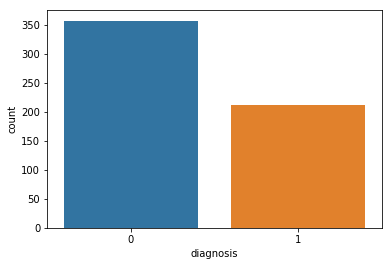

In [75]:
#0-> B  1-> M
y = dataset["diagnosis"]

sns.countplot(y)

diagnosis_temp = dataset.diagnosis.value_counts()

print(diagnosis_temp)

In [76]:
print("Percentage of patience without Breast Cancer: "+str(round(diagnosis_temp[0]*100/569,2)))
print("Percentage of patience with Breast Cancer: "+str(round(diagnosis_temp[1]*100/569,2)))

Percentage of patience without Breast Cancer: 62.74
Percentage of patience with Breast Cancer: 37.26


In [77]:
dataset.max()

id                          569.00000
diagnosis                     1.00000
radius_mean                  28.11000
texture_mean                 39.28000
perimeter_mean              188.50000
area_mean                  2501.00000
smoothness_mean               0.16340
compactness_mean              0.34540
concavity_mean                0.42680
concave points_mean           0.20120
symmetry_mean                 0.30400
fractal_dimension_mean        0.09744
radius_se                     2.87300
texture_se                    4.88500
perimeter_se                 21.98000
area_se                     542.20000
smoothness_se                 0.03113
compactness_se                0.13540
concavity_se                  0.39600
concave points_se             0.05279
symmetry_se                   0.07895
fractal_dimension_se          0.02984
radius_worst                 36.04000
texture_worst                49.54000
perimeter_worst             251.20000
area_worst                 4254.00000
smoothness_w

In [78]:
print('Maximum radius is:',dataset['radius_mean'].max())
print('Minimum radius is:',dataset['radius_mean'].min())

Maximum radius is: 28.11
Minimum radius is: 6.981


In [79]:
print('Maximum radius is:',dataset['texture_mean'].max())
print('Minimum radius is:',dataset['texture_mean'].min())

Maximum radius is: 39.28
Minimum radius is: 9.71


In [80]:
dataset.loc[dataset['radius_mean'].idxmax()]

id                          213.000000
diagnosis                     1.000000
radius_mean                  28.110000
texture_mean                 18.470000
perimeter_mean              188.500000
area_mean                  2499.000000
smoothness_mean               0.114200
compactness_mean              0.151600
concavity_mean                0.320100
concave points_mean           0.159500
symmetry_mean                 0.164800
fractal_dimension_mean        0.055250
radius_se                     2.873000
texture_se                    1.476000
perimeter_se                 21.980000
area_se                     525.600000
smoothness_se                 0.013450
compactness_se                0.027720
concavity_se                  0.063890
concave points_se             0.014070
symmetry_se                   0.047830
fractal_dimension_se          0.004476
radius_worst                 28.110000
texture_worst                18.470000
perimeter_worst             188.500000
area_worst               

In [81]:
dataset.loc[dataset['radius_mean'].idxmin()]

id                         102.00000
diagnosis                    0.00000
radius_mean                  6.98100
texture_mean                13.43000
perimeter_mean              43.79000
area_mean                  143.50000
smoothness_mean              0.11700
compactness_mean             0.07568
concavity_mean               0.00000
concave points_mean          0.00000
symmetry_mean                0.19300
fractal_dimension_mean       0.07818
radius_se                    0.22410
texture_se                   1.50800
perimeter_se                 1.55300
area_se                      9.83300
smoothness_se                0.01019
compactness_se               0.01084
concavity_se                 0.00000
concave points_se            0.00000
symmetry_se                  0.02659
fractal_dimension_se         0.00410
radius_worst                 7.93000
texture_worst               19.54000
perimeter_worst             50.41000
area_worst                 185.20000
smoothness_worst             0.15840
c

In [82]:
predictors = dataset.drop(['id','diagnosis'],axis=1)
target = dataset["diagnosis"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+"%")

The accuracy score achieved using Logistic Regression is: 95.61%


In [84]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+"%")

The accuracy score achieved using Naive Bayes is: 92.98%


In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+"%")

The accuracy score achieved using Random Forest is: 96.49%
